In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("ushape.csv", header=None)
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [21]:
df.columns

Index([0, 1, 2], dtype='int64')

In [22]:
df[0]

0     0.031595
1     2.115098
2     0.882490
3    -0.055144
4     0.829545
        ...   
95    1.699453
96    0.218623
97    0.952914
98   -1.318500
99   -1.296818
Name: 0, Length: 100, dtype: float64

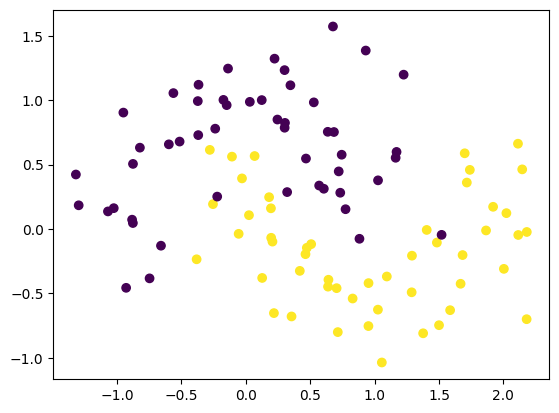

In [23]:
plt.scatter(df[0],df[1],c=df[2])

In [24]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [25]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [26]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\vikas\OneDrive\Desktop\Deep-Learning-CampusX\campus\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Set parameters to 0
model.get_weights()

[array([[ 0.12258208, -0.36907905],
        [-0.44096822,  1.098827  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.7555197 ],
        [ 0.12586296]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
initial_weights = model.get_weights()

In [29]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [30]:
model.set_weights(initial_weights)

In [31]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4883 - loss: 0.8557 - val_accuracy: 0.5000 - val_loss: 0.7755
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4961 - loss: 0.8502 - val_accuracy: 0.5000 - val_loss: 0.7729
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4844 - loss: 0.8719 - val_accuracy: 0.5000 - val_loss: 0.7704
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5156 - loss: 0.8303 - val_accuracy: 0.5000 - val_loss: 0.7679
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5234 - loss: 0.8321 - val_accuracy: 0.5000 - val_loss: 0.7655
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4727 - loss: 0.8697 - val_accuracy: 0.5000 - val_loss: 0.7630
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5078 - loss: 0.8202 - val_accuracy: 0.5000 - val_loss: 0.7606
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5039 - loss: 0.8359 - val_accuracy: 0.5000 - val_loss: 0.7583
Epoc

In [34]:
model.get_weights()

[array([[0.71564513, 0.71564513],
        [0.22420765, 0.22420765]], dtype=float32),
 array([0.25822628, 0.25822628], dtype=float32),
 array([[0.29884455],
        [0.29884455]], dtype=float32),
 array([0.25302908], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 480us/step


<Axes: >

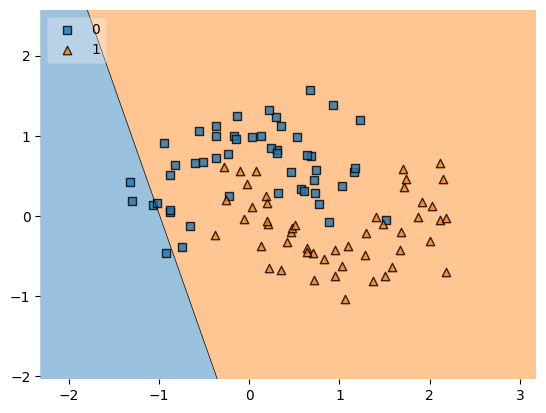

In [35]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [36]:
print("The End")

The End
